In [1]:
! pip install jieba wordcloud matplotlib
! pip install textblob

In [2]:
import requests
from bs4 import BeautifulSoup
import re
import jieba
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
headers={"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36"}
#設置網站
url = 'https://news.ltn.com.tw/list/breakingnews/world'
response = requests.get(url)

In [4]:
soup = BeautifulSoup(response.text, 'lxml')
# 提取 h2 标签中的 title 属性值
titles = soup.find_all("h3")

print(titles)

[<h3 class="title">基金業者警告：德國經濟對中國高度曝險 後果難料</h3>, <h3 class="title">遭爆料涉性騷女同仁 日本防衛政務官：完全不記得</h3>, <h3 class="title">台灣藝術家邱貴畫安倍 昭惠夫人見畫飆淚</h3>, <h3 class="title">習近平抵舊金山抗議如影隨形 抗議者稱遭中國保安毆打</h3>, <h3 class="title">聯合國人權官員還沒走 越南等不及逮捕大砲議員</h3>, <h3 class="title">印度喀什米爾巴士墜入山谷 至少30死25人傷</h3>, <h3 class="title">打破常規！美眾院議長表態挺川普再戰2024</h3>, <h3 class="title">鳥擊？班機引擎突起火緊急返航迫降 驚險畫面曝</h3>, <h3 class="title">致力以巴和解數十年 加籍人權運動人士證實遭哈瑪斯殺害</h3>, <h3 class="title">驚！史上最強伽馬射線暴衝向地球 部分臭氧層一度被摧毀</h3>, <h3 class="title">自由說新聞》哈瑪斯總部遭炸成火球！以國曝戰爭在「此時」結束</h3>, <h3 class="title">以軍攻進西法醫院  國安官員曝「將視需求擴大行動」</h3>, <h3 class="title">對俄不滿！ 亞美尼亞總理拒絕參加集安組織峰會</h3>, <h3 class="title">大阪市民團體提交9萬人連署書 要求取消大阪世博</h3>, <h3 class="title">比電影還可怕！美恐怖片導演肢解老婆 岳父母恐也慘遭毒手</h3>, <h3 class="title">以色列同意向聯合國卡車提供燃料 但不適用醫院</h3>, <h3 class="title">以軍攻入西法醫院 白宮首發聲：不希望看到醫院發生交火</h3>, <h3 class="title">日美韓外長會談 確認嚇阻北韓、援烏抗俄路線</h3>, <h3 class="title">57刀刺死女友 入獄1年後爆肥80公斤獲釋</h3>, <h3 class="title">以軍攻入西法醫院 巴勒斯坦衛生部長怒轟犯「反人類罪」</h3>]


In [5]:
# 將 ResultSet 轉換為字符
text = "\n".join([title.get_text() for title in titles])


In [6]:
#test
import string
# 使用正则表达式提取 h3 标签中的内容
titles = [tag.get_text(strip=True) for tag in soup.find_all('h3')]

# 定义一个函数，用于去除标点符号
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# 对标题进行正则化和去除标点符号
normal = [remove_punctuation(re.sub(r'<.*?>', '', title)) for title in titles]

print(normal)

['基金業者警告德國經濟對中國高度曝險 後果難料', '遭爆料涉性騷女同仁 日本防衛政務官完全不記得', '台灣藝術家邱貴畫安倍 昭惠夫人見畫飆淚', '習近平抵舊金山抗議如影隨形 抗議者稱遭中國保安毆打', '聯合國人權官員還沒走 越南等不及逮捕大砲議員', '印度喀什米爾巴士墜入山谷 至少30死25人傷', '打破常規美眾院議長表態挺川普再戰2024', '鳥擊班機引擎突起火緊急返航迫降 驚險畫面曝', '致力以巴和解數十年 加籍人權運動人士證實遭哈瑪斯殺害', '驚史上最強伽馬射線暴衝向地球 部分臭氧層一度被摧毀', '自由說新聞哈瑪斯總部遭炸成火球以國曝戰爭在此時結束', '以軍攻進西法醫院  國安官員曝將視需求擴大行動', '對俄不滿 亞美尼亞總理拒絕參加集安組織峰會', '大阪市民團體提交9萬人連署書 要求取消大阪世博', '比電影還可怕美恐怖片導演肢解老婆 岳父母恐也慘遭毒手', '以色列同意向聯合國卡車提供燃料 但不適用醫院', '以軍攻入西法醫院 白宮首發聲不希望看到醫院發生交火', '日美韓外長會談 確認嚇阻北韓援烏抗俄路線', '57刀刺死女友 入獄1年後爆肥80公斤獲釋', '以軍攻入西法醫院 巴勒斯坦衛生部長怒轟犯反人類罪']


In [7]:
#test
# 将列表合并为一个字符串
merged= ''.join(normal)

print(merged)

基金業者警告德國經濟對中國高度曝險 後果難料遭爆料涉性騷女同仁 日本防衛政務官完全不記得台灣藝術家邱貴畫安倍 昭惠夫人見畫飆淚習近平抵舊金山抗議如影隨形 抗議者稱遭中國保安毆打聯合國人權官員還沒走 越南等不及逮捕大砲議員印度喀什米爾巴士墜入山谷 至少30死25人傷打破常規美眾院議長表態挺川普再戰2024鳥擊班機引擎突起火緊急返航迫降 驚險畫面曝致力以巴和解數十年 加籍人權運動人士證實遭哈瑪斯殺害驚史上最強伽馬射線暴衝向地球 部分臭氧層一度被摧毀自由說新聞哈瑪斯總部遭炸成火球以國曝戰爭在此時結束以軍攻進西法醫院  國安官員曝將視需求擴大行動對俄不滿 亞美尼亞總理拒絕參加集安組織峰會大阪市民團體提交9萬人連署書 要求取消大阪世博比電影還可怕美恐怖片導演肢解老婆 岳父母恐也慘遭毒手以色列同意向聯合國卡車提供燃料 但不適用醫院以軍攻入西法醫院 白宮首發聲不希望看到醫院發生交火日美韓外長會談 確認嚇阻北韓援烏抗俄路線57刀刺死女友 入獄1年後爆肥80公斤獲釋以軍攻入西法醫院 巴勒斯坦衛生部長怒轟犯反人類罪


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Jessica\AppData\Local\Temp\jieba.cache
Loading model cost 0.598 seconds.
Prefix dict has been built successfully.


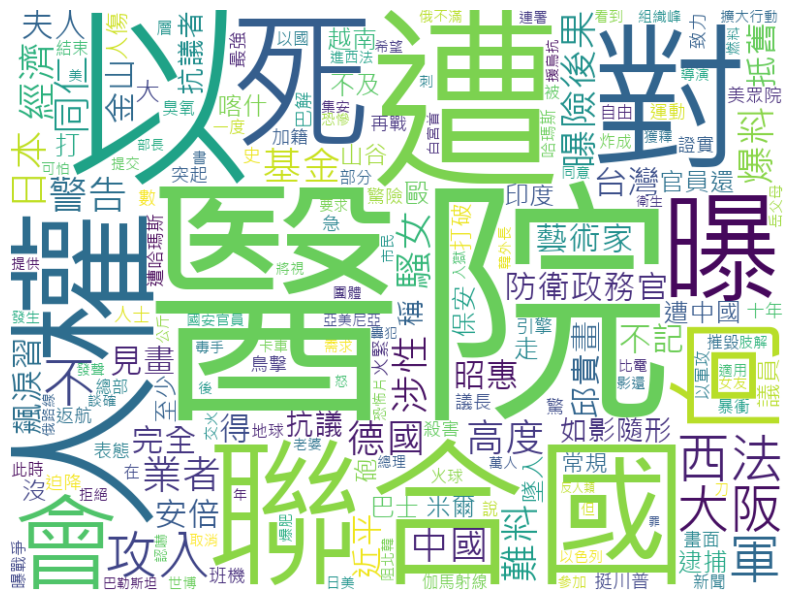

In [8]:
# 定义需要删除的连接词列表
stopwords =  r"的|了|和|是|就|也|歲|等|因|上"
cleaned_text = re.sub(r'[A-Za-z!@#$%^&*()_+{}[\]:;"\'<>,.?~\\/\-|=]', '', text)
cleaned_text = re.sub(stopwords, '', cleaned_text)
cleaned_text = re.sub(r'\s+', '', cleaned_text)

# 使用 jieba 进行中文分词
seg_list = jieba.cut(cleaned_text, cut_all=False)
# 将分词结果连接为一个字符串
seg_string = ' '.join(seg_list)

# 设置字体路径
font_path = "c:\Windows\Fonts\msjh.ttc"

# 创建 WordCloud 对象
wc = WordCloud(
    font_path=font_path,
    background_color="white",
    width=800,
    height=600
)

# 生成词云图像
wordcloud = wc.generate(seg_string)

# 显示词云
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()